# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [344]:
# Your code here. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [354]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


In [355]:
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values}) 

In [347]:

student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

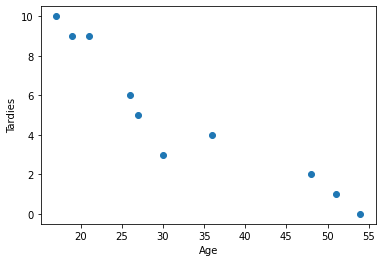

In [348]:
# Your code here.

fig, ax = plt.subplots(1, 1)
plt.scatter(student_data['Age'],student_data['Tardies'])
ax.set_xlabel('Age')
ax.set_ylabel('Tardies')






Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [349]:
# Your response here. 
#The younger the students are, the later they are. There is a negative correllation between both variables.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [350]:
# Your response here.
student_data.Age.corr(student_data['Tardies'])
#This implies that both variables are highly correlated, and they have a negative correllation. 

-0.9391626886887122

In [351]:
student_data = np.array([x_values, y_values])

covMatrix = np.cov(student_data,bias=True)
covMatrix

#There is a negative covariance, which means that if x(Age) increases, y(Tardies) decreases. 

array([[168.89, -41.01],
       [-41.01,  11.29]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [352]:
# Your response here.
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [356]:
r, _ = stats.pearsonr(student_data.Age, student_data.Tardies)

In [357]:
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.Age, student_data.Tardies)

In [338]:
slope

-0.2428207709159808

In [339]:
intercept

12.888803363135768

In [340]:
r_value

-0.9391626886887121

In [358]:
lr = LinearRegression()

In [359]:
x = student_data[['Age']]

In [360]:
y = student_data['Tardies']

In [361]:
model.fit(x,y)

LinearRegression()

In [362]:
model.score(x,y)

0.8820265558250109

In [363]:
y_pred = model.predict(x)
y_pred

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

In [364]:
r2_score(y, y_pred)

0.8820265558250109

In [365]:
mean_squared_error(y, y_pred)

1.3319201847356268

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

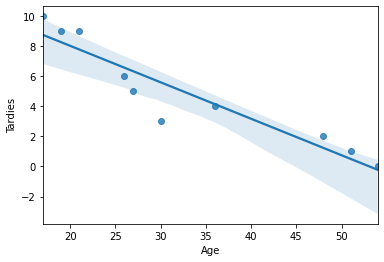

In [366]:
# Your code here.
sns.regplot(data=student_data, x='Age', y='Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
#There's a negative correlation between the Age and the tardiness, the R2 is o.88 which is quite good, meaning the model explains 88.2% of the variation of the variable Tardies. Also, the mean squared error is quite small. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [367]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/laurasg/Documents/Ironhack_data/27-lab-regression-analysis/vehicles.csv')

In [368]:
vehicles.head(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [369]:
# Your response here. 
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year','CO2 Emission Grams/Mile']].corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)


CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Cylinders                  0.752393
Year                      -0.222300
Name: CO2 Emission Grams/Mile, dtype: float64

In [370]:
#Fuel Barrels/Year is the most correllated with CO2 Emission, the least correllated is Year.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [371]:
# Your response here. 
lr = LinearRegression()

In [372]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year']]

In [373]:
y = vehicles['CO2 Emission Grams/Mile']

In [374]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [375]:
lr.fit(X_train, y_train)

LinearRegression()

In [376]:
lr.score(X_train, y_train)

0.9712403051042248

In [377]:
lr.score(X_test, y_test)

0.9807674240271623

In [378]:
lr.coef_

array([-0.26187252,  4.48180737, 24.80980861])

In [379]:
y_pred = lr.predict(X)
y_pred

array([515.99350429, 672.96727318, 545.79619433, ..., 249.51512054,
       249.25324802, 255.74337582])

In [380]:
r2_score(y, y_pred)

0.9740808651710723

In [381]:
mean_squared_error(y, y_pred)

367.4056395671999

In [382]:
X = vehicles[['Fuel Barrels/Year']]

In [383]:
y = vehicles['CO2 Emission Grams/Mile']

In [384]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [385]:
lr.fit(X_train, y_train)

LinearRegression()

In [386]:
lr.score(X_train, y_train)

0.9773589318624427

In [387]:
lr.score(X_test, y_test)

0.9614688663860731

In [388]:
r2_score(y, y_pred)

0.9740808651710723

In [389]:
mean_squared_error(y, y_pred)

367.4056395671999

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [390]:
# Your response here. 
#Our R2 score is 0.97, which means the model explains 97.40% of the variation of the variable. On the other hand, the mean squared error seems to be quite high.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [410]:
# Your code here. 
parties = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invited', ylabel='attended'>

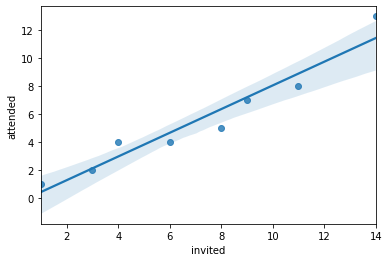

In [411]:
# Your code here.
sns.regplot(data=parties, x='invited', y='attended')

<AxesSubplot:>

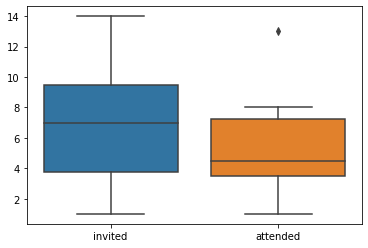

In [412]:
sns.boxplot(data=parties)

In [404]:
parties.describe()

,invited,attended
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


In [393]:
r2_score(y, y_pred)

0.9740808651710723

In [394]:
mean_squared_error(y, y_pred)

367.4056395671999

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [395]:
# Your response here. 
#There is a positive relationship between both variables. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [396]:
# Your response here. 


In [397]:
third_quartile =np.percentile(parties['attended'], 75)
third_quartile

7.25

In [398]:
first_quartile = np.percentile(parties['attended'], 25)
first_quartile

3.5

In [399]:
upper_limit = third_quartile + value
upper_limit

12.875

In [400]:
lower_limit = first_quartile - value
lower_limit

-2.125

In [401]:
IQR= third_quartile - first_quartile
IQR

3.75

In [402]:
value = 1.5 *IQR
value

5.625

In [405]:
no_outliers = parties[(parties['attended']> lower_limit) & (parties['attended']<upper_limit)]

In [406]:
no_outliers

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [407]:
no_outliers.describe()

,invited,attended
count,7.000000,7.000000
mean,6.000000,4.428571
std,3.559026,2.507133
min,1.000000,1.000000
25%,3.500000,3.000000
50%,6.000000,4.000000
75%,8.500000,6.000000
max,11.000000,8.000000


<AxesSubplot:>

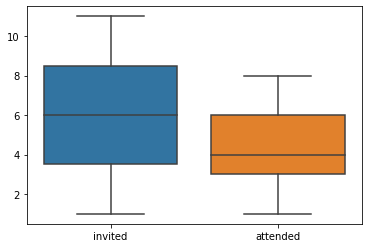

In [409]:
sns.boxplot(data=no_outliers)

<AxesSubplot:xlabel='invited', ylabel='attended'>

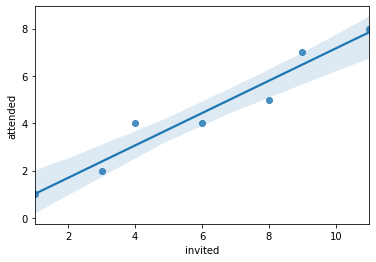

In [321]:
sns.regplot(data=no_outliers, x='invited', y='attended')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#Without the outliers the data is more normalized, the mean is more centered and the model should be more accurate.